## Collaborators:

1. Akhil Shekkari (UID : 121322784)
2. Anirudh Jayaprakash (UID : 120622342)

## **Introduction**

This project aims to analyze loan application df to predict whether a loan should be approved for an individual. When a customer applies for a loan, companies use statistical models to evaluate the likelihood of repayment. The decision-making process involves assessing various complex factors and conducting detailed statistical analysis and modeling to estimate the repayment probabilities for each applicant.

### **1. Motivation**

**Risk Management:** Predicting whether a loan should be approved helps in managing financial risk. By accurately assessing the likelihood of repayment, the company can minimize the risk of defaults, which can have significant financial implications.

**Profitability:** Effective loan approval processes directly impact the profitability of the lending institution. By approving loans to individuals who are likely to repay, the company can ensure a steady stream of revenue from interest payments while avoiding losses from bad debts.

**Customer Satisfaction:** A streamlined and accurate loan approval process enhances customer satisfaction. Applicants receive quicker decisions, and those who are eligible for loans are more likely to be approved, leading to a better customer experience.

### How Data Science Helps
**Data Analysis:** df science techniques allow for the analysis of large volumes of loan application df to identify patterns and trends. This helps in understanding the factors that influence loan repayment and default.

**Predictive Modeling:** Machine learning algorithms are used to build predictive models that estimate the likelihood of loan approval based on historical data. These models can be trained on labeled df to learn the patterns associated with approved and rejected loans.

In [ ]:
# Import all necessary libraries at one place

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from fancyimpute import SoftImpute



### Data is downloaded from Kaggle

Kaggle link: https://www.kaggle.com/datasets/sidd1996/loan-eligibility

In [ ]:
#Importing the dataset
df = pd.read_csv("data.csv")

In [ ]:
# Taking a peek at data
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Loan Refused,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Loan Refused,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Loan Refused,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32.0,11,1,11275,14815,1.0,0.0
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Loan Refused,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Loan Refused,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0


The goal is to remove any duplicate entries based on the "Loan ID" column. This ensures that each loan is represented only once in the dfset.

## Data Cleaning, Exploratory df Analysis & Data Preprocessing

## Exploratory Data Analysis and Data preprocessing

## Approach

1. **Data cleaning** involves identifying and correcting errors or inconsistencies in the dataset to ensure the data is accurate and reliable.

2. **EDA** is the process of analyzing the dataset to uncover patterns, trends, and relationships among variables.

3. **Data preprocessing** involves transforming raw df into a format suitable for modeling. This includes encoding categorical variables using techniques like one-hot encoding or label encoding, scaling numerical features to ensure they are on a similar scale, and splitting the data into training and testing sets.

In [6]:
##Drop the duplicates with respect to LOAN ID
print(f'No of rows before deleting duplicate rows: {len(df)}')
df.drop_duplicates(subset="Loan ID",keep='first',inplace=True)
print(f'No of rows after deleting duplicate rows: {len(df)}')

No of rows before deleting duplicate rows: 111107
No of rows after deleting duplicate rows: 88910


Around 22297 duplicate records were found based on loanID

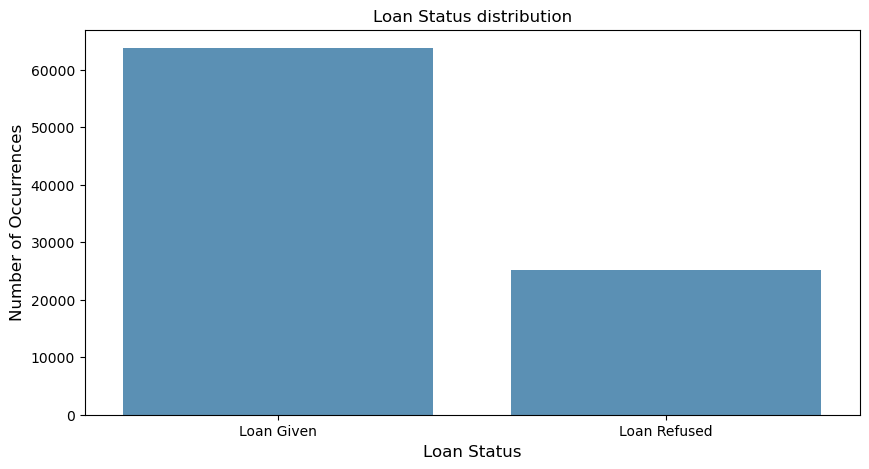

In [7]:
# Plotting the loan status 

status=df["Loan Status"].value_counts() 
plt.figure(figsize=(10,5))
sns.barplot(x=status.index, y=status.values, alpha=0.8)
plt.title('Loan Status distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Loan Status', fontsize=12)
plt.show() 

1. The chart clearly shows a significant imbalance between the two classes, with a much larger number of loans being approved (“Loan Given”) compared to those refused (“Loan Refused”).
2. This imbalance could pose challenges in building predictive models, as the classifier might be biased toward the majority class.

In [8]:
# Plotting the loan status 

pd.options.display.float_format = '{:.2f}'.format

# Display the summary statistics
status = df["Current Loan Amount"].describe()
print(status)

# Reset to default formatting if needed later
pd.reset_option('display.float_format')

count      88910.00
mean    14338784.86
std     35029958.37
min          491.00
25%         8283.00
50%        14355.00
75%        24485.00
max     99999999.00
Name: Current Loan Amount, dtype: float64


There are extreme outliers, we need to cap values

IQR is: 16202.0
Outliers are: 
5044     99999999
5045     99999999
5046     99999999
5047     99999999
5048     99999999
           ...   
17777    99999999
17778    99999999
17779    99999999
17780    99999999
17781    99999999
Name: Current Loan Amount, Length: 12738, dtype: int64


<Axes: ylabel='Frequency'>

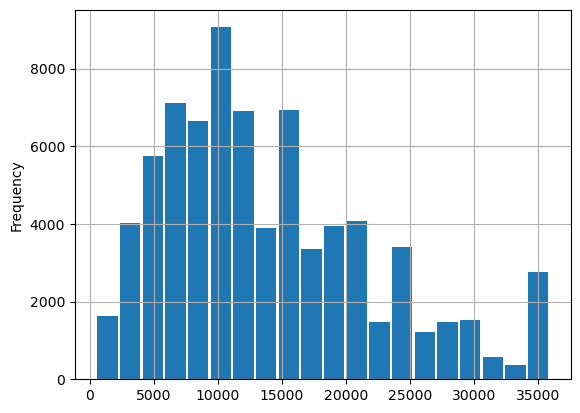

In [9]:
import numpy as np
import pandas as pd

# Calculating the first quartile (Q1) and third quartile (Q3) for the "Current Loan Amount" column
Q1 = df["Current Loan Amount"].quantile(0.25)
Q3 = df["Current Loan Amount"].quantile(0.75)

# Calculating the Interquartile Range (IQR)
IQR = Q3 - Q1
print(f'IQR is: {IQR}')

# Identifying outliers in the "Current Loan Amount" column using the IQR method
outliers = df["Current Loan Amount"][
    (df["Current Loan Amount"] < (Q1 - 1.5 * IQR)) |
    (df["Current Loan Amount"] > (Q3 + 1.5 * IQR))
]
print(f'Outliers are: \n{outliers}')

# Converting the "Current Loan Amount" column to a numpy array for easier manipulation
temp = np.array(df["Current Loan Amount"].values.tolist())

# Replacing values greater than 9999998 with 'NaN' in the "Current Loan Amount_temp" column
df["Current Loan Amount_temp"] = np.where(temp > 9999998, 'NaN', temp).tolist()

# Filtering out 'NaN' values and converting the remaining values to integers
temp = df["Current Loan Amount_temp"][df["Current Loan Amount_temp"] != 'NaN'].astype(str).astype(int)

# Plotting a histogram of the "Current Loan Amount_temp" column
temp.plot.hist(grid=True, bins=20, rwidth=0.9)

1. The df appears to be approximately unimodal with a clear peak around the range of 10,000–15,000.
2. The distribution is right-skewed, with a gradual tapering off as values increase beyond 20,000.

In [10]:
# Replacing the df with the 50th percentile (median) or mean
temp = np.array(df["Current Loan Amount"].values.tolist())

# I am replacing values greater than 9999998 with 12038 (which could be the median or mean)
df["Current Loan Amount"] = np.where(temp > 9999998, 12038, temp).tolist()

# Dropping the temporary column "Current Loan Amount_temp"
df = df.drop(['Current Loan Amount_temp'], axis=1)

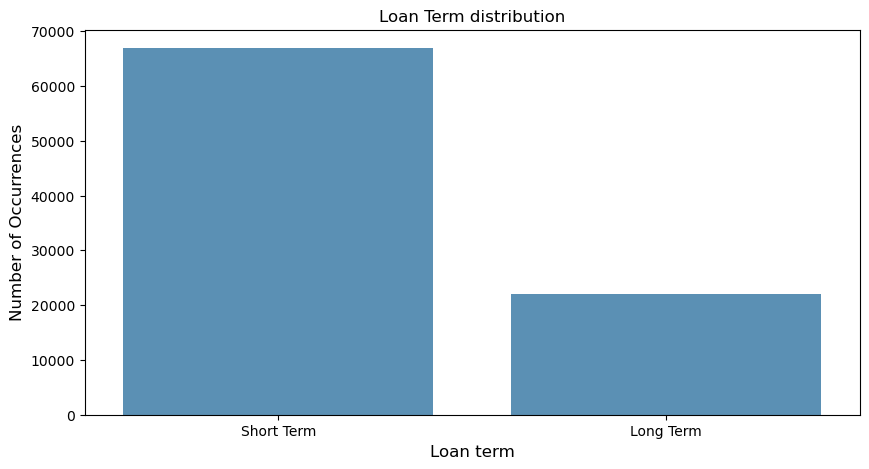

In [11]:
# Analyzing the distribution of the "Term" column
status = df["Term"].value_counts()

# Creating a bar plot to visualize the distribution of loan terms
plt.figure(figsize=(10, 5))  
sns.barplot(x=status.index, y=status.values, alpha=0.8)  
plt.title('Loan Term distribution')  
plt.ylabel('Number of Occurrences', fontsize=12) 
plt.xlabel('Loan term', fontsize=12)  
plt.show()  

1. The predominance of loans in one category suggests a preference or business trend favoring shorter loan terms.
2. Further exploration may reveal why longer loan terms are less common—this could be due to customer preferences, credit risk, or company policies.


In [12]:
## Credit Score
print(f'null values are: {df["Credit Score"].isnull().sum()}')
print(df["Credit Score"].describe())

null values are: 21338
count    67572.000000
mean      1199.199580
std       1680.813805
min        585.000000
25%        714.000000
50%        733.000000
75%        744.000000
max       7510.000000
Name: Credit Score, dtype: float64


1. The mean credit score is 1075.79, which also indicates skewed df due to the presence of outliers.
2. The median (50th percentile) is 724, which is within the valid range and reflects the central tendency of the majority of the df.
3. The interquartile range (IQR) is relatively narrow (705-741), showing that most valid scores fall within a reasonable range.

In [13]:
# Now let's do treatment of the df at hand.
# dividing the values greater than 800 by 10 in the "Credit Score" column

df["Credit Score"] = np.where(df["Credit Score"] > 800, df["Credit Score"] / 10, df["Credit Score"])

<Axes: xlabel='Credit Score_1', ylabel='Count'>

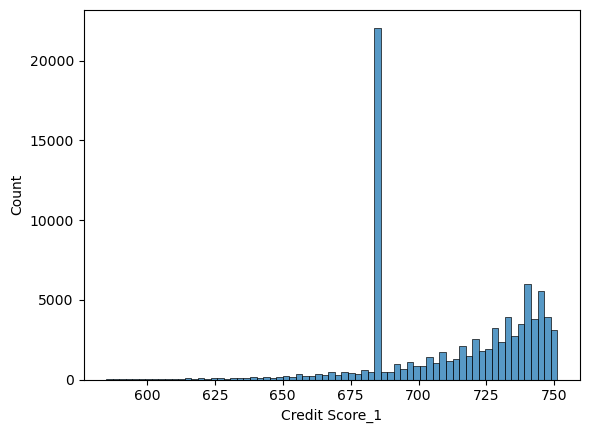

In [14]:
#Now lets replace the missing values with median 

median_score=statistics.median(df["Credit Score"])
df["Credit Score_1"]=df["Credit Score"]
df["Credit Score_1"].fillna(median_score, inplace = True) 
sns.histplot(df["Credit Score_1"])

As we can see this df is skewed so when we replace it with median it is giving us problems. Replacing with 75th percentile and taking log we get a better distribution

In [15]:
df["Credit Score"].fillna(741, inplace = True) 

In [16]:
print(df['Home Ownership'].unique())

df['Home Ownership']=df['Home Ownership'].str.replace('HaveMortgage', 'Home Mortgage', regex=True)
print(df['Home Ownership'].unique())

['Rent' 'Home Mortgage' 'Own Home' 'HaveMortgage']
['Rent' 'Home Mortgage' 'Own Home']


As we can see it has Home Mortgage and haveMortgage as 2 different classes. we have fixed that


In [17]:
## Annual Income
print(df['Annual Income'].describe())
df['Annual Income'].quantile([.2,0.75,0.90,.95,0.99,.999])

count    6.757200e+04
mean     7.234575e+04
std      5.836101e+04
min      4.033000e+03
25%      4.458600e+04
50%      6.149400e+04
75%      8.675025e+04
max      8.713547e+06
Name: Annual Income, dtype: float64


0.200     40764.00
0.750     86750.25
0.900    119916.00
0.950    147645.00
0.990    239286.96
0.999    491575.77
Name: Annual Income, dtype: float64

Observing that these values lie in the 99th percentile of the df, replacing them
Capping any values greater than the 99th percentile to the 99th percentile value

In [18]:
df.loc[df['Annual Income'] > 239287, 'Annual Income'] = 239287

In [19]:
## Loan Purpose 
df['Purpose'].value_counts()

#Lets combine the "Other" values which represent the same

df['Purpose']=df['Purpose'].str.replace('Other', 'other', regex=True)

<Axes: xlabel='Monthly Debt', ylabel='Density'>

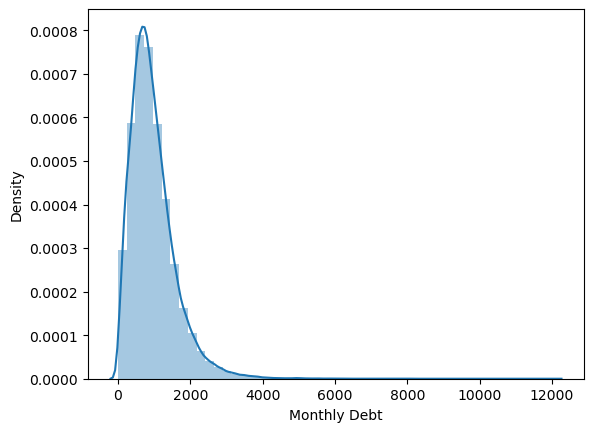

In [20]:
## Monthly debt(has a dollar sign)

df['Monthly Debt'].describe()
df['Monthly Debt']=df['Monthly Debt'].str.replace('$', '')
df['Monthly Debt']=pd.to_numeric(df['Monthly Debt'] )

sns.distplot(df["Monthly Debt"])


In [21]:
# Monthly Debt

df['Monthly Debt'].describe()
#The max value is too high here

count    65536.000000
mean       962.406632
std        632.799593
min          0.000000
25%        532.250000
50%        843.770000
75%       1251.342500
max      12055.680000
Name: Monthly Debt, dtype: float64

In [22]:
# Lets look at Quantiles
df['Monthly Debt'].quantile([.2,0.75,0.90,.95,0.99,.999])

0.200     464.21000
0.750    1251.34250
0.900    1740.35000
0.950    2112.21000
0.990    3084.08600
0.999    4927.21625
Name: Monthly Debt, dtype: float64

In [23]:
#Need to replace this
df.loc[df['Monthly Debt'] > 4926, 'Monthly Debt'] = 4926

<Axes: xlabel='Years of Credit History', ylabel='Density'>

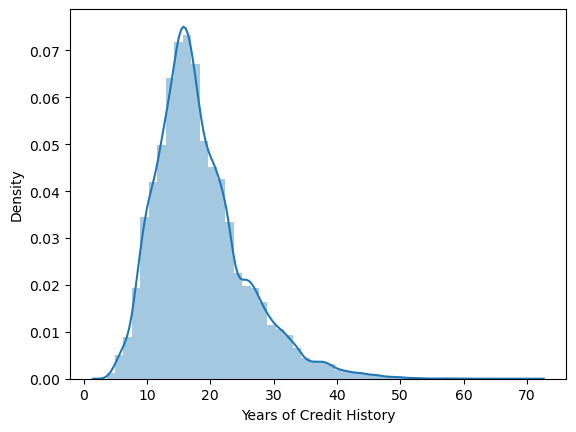

In [24]:
## Years of credit history 
df['Years of Credit History'].value_counts()
sns.distplot(df["Years of Credit History"])

The distribution appears to be unimodal and slightly right-skewed. Most of the values are concentrated around 10–20 years of credit history, indicating that the majority of individuals fall within this range.

In [25]:
# Months since last delinquent
df['Months since last delinquent'].describe()

count    40404.000000
mean        35.080289
std         22.008583
min          0.000000
25%         16.000000
50%         32.000000
75%         51.000000
max        176.000000
Name: Months since last delinquent, dtype: float64

In [26]:
## Number of open accounts 

df['Number of Open Accounts'].describe()
#The max number seems odd. Lets investigate

count    88910.000000
mean        11.110348
std          4.978461
min          0.000000
25%          8.000000
50%         10.000000
75%         14.000000
max         76.000000
Name: Number of Open Accounts, dtype: float64

<Axes: xlabel='Number of Open Accounts', ylabel='Density'>

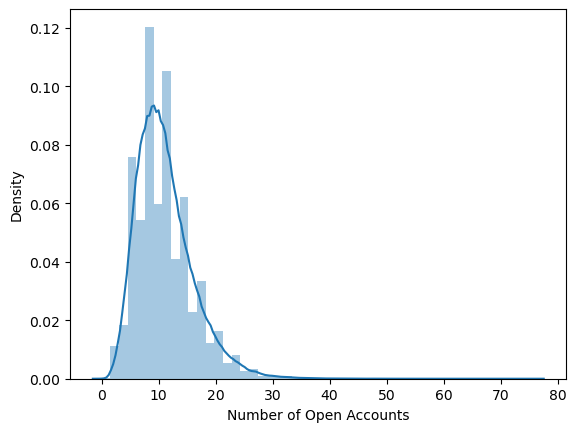

In [27]:
sns.distplot(df['Number of Open Accounts'])
#Yes there are outliers in this columns. Let dig deeper

In [28]:
df['Number of Open Accounts'].quantile([0.75,0.999,1])
#Ok so replacing anything greater than 99th percentile with 99th percentile values

0.750    14.0
0.999    36.0
1.000    76.0
Name: Number of Open Accounts, dtype: float64

<Axes: xlabel='Number of Open Accounts', ylabel='Density'>

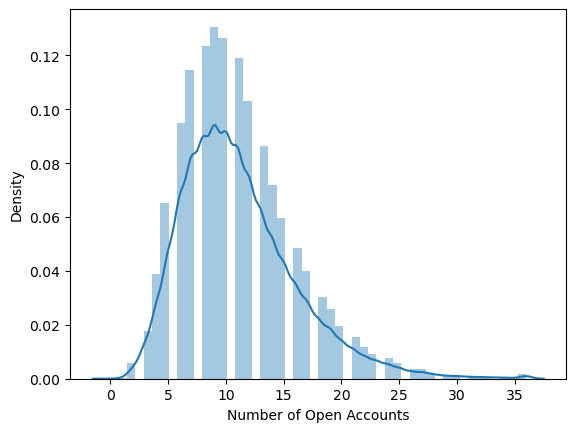

In [29]:
df.loc[df['Number of Open Accounts'] > 36, 'Number of Open Accounts'] = 36
sns.distplot(df['Number of Open Accounts'])


<Axes: xlabel='Current Credit Balance', ylabel='Density'>

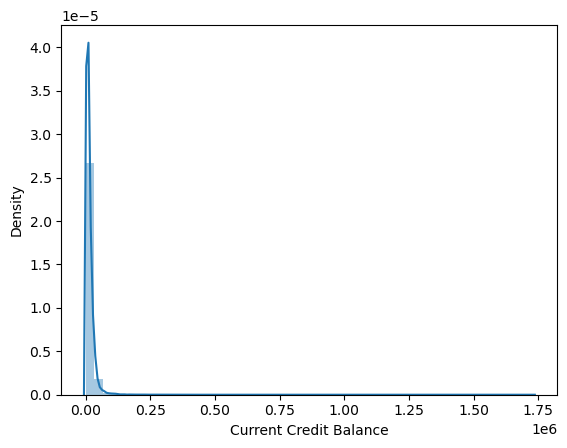

In [30]:
# Current Credit Balance

df['Current Credit Balance'].describe()
sns.distplot(df['Current Credit Balance'])
#It seems there are outliers in this df. 

In [31]:
df['Current Credit Balance'].quantile([0.75,0.95,0.999,1])

0.750      19301.000
0.950      39933.300
0.999     227670.033
1.000    1730472.000
Name: Current Credit Balance, dtype: float64

In [32]:
# Further Investigation

df['Current Credit Balance'].quantile([0.95,0.96,0.97,0.98,0.99,1])

0.95      39933.30
0.96      43501.20
0.97      48507.73
0.98      57938.12
0.99      81007.19
1.00    1730472.00
Name: Current Credit Balance, dtype: float64

In [33]:
#So lets replace it with 95th percentile

df['Current Credit Balance'].quantile([0.55,0.76,0.87,0.95,0.98,0.99,1])

0.55      12295.00
0.76      19805.84
0.87      27525.66
0.95      39933.30
0.98      57938.12
0.99      81007.19
1.00    1730472.00
Name: Current Credit Balance, dtype: float64

<Axes: xlabel='Current Credit Balance', ylabel='Density'>

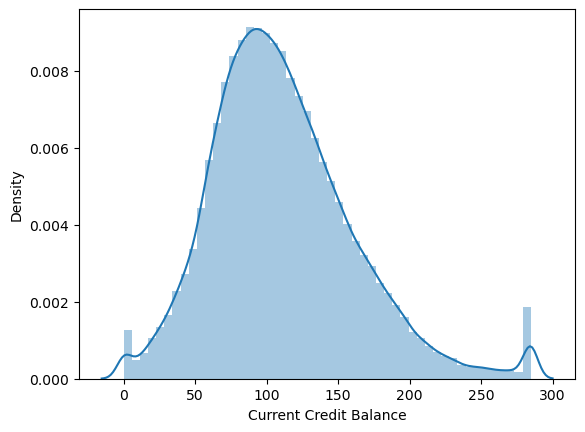

In [34]:
df.loc[df['Current Credit Balance'] > 81007, 'Current Credit Balance'] = 81007
sns.distplot(df['Current Credit Balance']**(1/2))

In [35]:
df['Current Credit Balance']=df['Current Credit Balance']**(1/2)

In [36]:
# Max open credit
print(df['Maximum Open Credit'].describe())
df['Maximum Open Credit'].value_counts()

count     88910
unique    58216
top           0
freq        450
Name: Maximum Open Credit, dtype: object


Maximum Open Credit
0         450
0         160
15847       9
17464       9
6827        8
         ... 
28296       1
10199       1
132602      1
10395       1
21124       1
Name: count, Length: 58216, dtype: int64

In [37]:
#sns.distplot(df['Maximum Open Credit'])
#So there are some str characters present in the df. Lets find them
#could not convert string to float: '#VALUE!'

In [38]:
#pd.to_numeric(df['Maximum Open Credit'])
#Unable to parse string "#VALUE!" at position 4930

In [39]:
#Lets replace #value with Nan
df['Maximum Open Credit']=df['Maximum Open Credit'].replace('#VALUE!', np.nan, regex=True)

In [40]:
df['Maximum Open Credit']=pd.to_numeric(df['Maximum Open Credit'])

In [41]:
# Handle Outliers
df['Maximum Open Credit'].quantile([0.55,0.76,0.87,0.98,0.99,1])

0.55       24036.85
0.76       37260.00
0.87       50737.00
0.98      114682.88
0.99      171423.93
1.00    69988086.00
Name: Maximum Open Credit, dtype: float64

In [42]:
#Lets replace the outliers
df.loc[df['Maximum Open Credit'] > 171423, 'Maximum Open Credit'] = 171423

In [43]:
df['Maximum Open Credit'].isnull().sum()

#Now we have only 2 Nan;s in the df. Lets replace them with mean  

2

In [44]:
# Calculating the mean of the "Maximum Open Credit" column
mean_max_open_credit = df['Maximum Open Credit'].mean()

# Filling missing values in the "Maximum Open Credit" column with the calculated mean
df['Maximum Open Credit'] = df['Maximum Open Credit'].fillna(mean_max_open_credit)

# df['Maximum Open Credit']=df['Maximum Open Credit'].fillna(35965)

In [45]:
## Bankruptcies
df['Bankruptcies'].describe()


count    88718.000000
mean         0.112672
std          0.343300
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: Bankruptcies, dtype: float64

In [46]:
df['Bankruptcies'].value_counts()

Bankruptcies
0.0    79323
1.0     8936
2.0      353
3.0       80
4.0       19
5.0        5
7.0        1
6.0        1
Name: count, dtype: int64

The Bankruptcies variable is highly skewed (as seen from the value counts: most values are 0, with very few higher numbers). Using the mean could disproportionately inflate the imputation value because of the rare higher values (outliers).

In [47]:
df['Bankruptcies'].unique()
#So we have Nan's. Lets fill them with median

array([ 0.,  1., nan,  2.,  4.,  3.,  5.,  7.,  6.])

In [48]:
# Calculating the median of the "Bankruptcies" column
median_bankruptcies = df['Bankruptcies'].median()

# Filling missing values in the "Bankruptcies" column with the calculated median
df['Bankruptcies'] = df['Bankruptcies'].fillna(median_bankruptcies)
# df['Bankruptcies']=df['Bankruptcies'].fillna(3)

In [49]:
df['Tax Liens'].describe()

count    88902.000000
mean         0.028222
std          0.257533
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         15.000000
Name: Tax Liens, dtype: float64

In [50]:
df['Tax Liens'].value_counts()

Tax Liens
0.0     87274
1.0      1132
2.0       305
3.0        99
4.0        52
5.0        17
6.0         9
7.0         5
9.0         4
8.0         2
15.0        1
10.0        1
11.0        1
Name: count, dtype: int64

In [51]:
import pandas as pd

# List of categorical columns to be factorized
cat_cols = ['Term', 'Years in current job', 'Home Ownership', 'Purpose']

# Iterating over each categorical column
for c in cat_cols:
    # Factorizing the categorical column and assigning the codes back to the dfFrame
    df[c] = df[c].astype('category').cat.codes

SoftImpute is a powerful tool for handling missing df by leveraging matrix factorization techniques. It provides a robust way to impute missing values while preserving the underlying structure of the df.

In [54]:
#Imputing missing df with soft impute
updated_df=pd.DataFrame(data=SoftImpute().fit_transform(df[df.columns[3:19]],), columns=df[df.columns[3:19]].columns, index=df.index)
#Getting the dfset ready pd.get dummies function for dropping the dummy variables
df_LC = pd.get_dummies(updated_df, drop_first=True)

[SoftImpute] Max Singular Value of X_init = 23092208.626175
[SoftImpute] Iter 1: observed MAE=261.590769 rank=3
[SoftImpute] Iter 2: observed MAE=258.659057 rank=3
[SoftImpute] Iter 3: observed MAE=258.318215 rank=3
[SoftImpute] Iter 4: observed MAE=258.295367 rank=3
[SoftImpute] Iter 5: observed MAE=258.315118 rank=3
[SoftImpute] Iter 6: observed MAE=258.340504 rank=3
[SoftImpute] Iter 7: observed MAE=258.365968 rank=3
[SoftImpute] Iter 8: observed MAE=258.390463 rank=3
[SoftImpute] Iter 9: observed MAE=258.413768 rank=3
[SoftImpute] Iter 10: observed MAE=258.435785 rank=3
[SoftImpute] Iter 11: observed MAE=258.456458 rank=3
[SoftImpute] Iter 12: observed MAE=258.475717 rank=3
[SoftImpute] Iter 13: observed MAE=258.493689 rank=3
[SoftImpute] Iter 14: observed MAE=258.510357 rank=3
[SoftImpute] Iter 15: observed MAE=258.525747 rank=3
[SoftImpute] Iter 16: observed MAE=258.539967 rank=3
[SoftImpute] Iter 17: observed MAE=258.553169 rank=3
[SoftImpute] Iter 18: observed MAE=258.565323 ra

In [57]:
# converting the target variable "Loan Status" to binary variable
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(df['Loan Status']).ravel()

# Scaling the independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_LC)

# Printing the scaled independent variables
print(X_scaled)
print('   ')
print(X_scaled.shape)

[[-0.1869176   0.57302977  0.06886311 ... -0.79845    -0.32781073
  -0.10958408]
 [ 1.48349848 -1.74511004  0.26644983 ...  1.83826484 -0.32781073
  -0.10958408]
 [ 0.32079375  0.57302977 -0.08920626 ... -0.53976837  2.58792074
  -0.10958408]
 ...
 [ 1.40247376  0.57302977  0.78017528 ...  0.912336   -0.32781073
  -0.10958408]
 [-1.1281112   0.57302977 -0.16824094 ... -0.40393133 -0.32781073
  -0.10958408]
 [ 0.62515919  0.57302977 -0.32631031 ... -0.30217594 -0.32781073
   3.77361205]]
   
(88910, 16)


In [58]:
y.shape

(88910,)

## **Summary of what we did**

In this tutorial, we conducted comprehensive Exploratory df Analysis (EDA) to gain insights into the loan application df and prepare it for modeling. The EDA process involved several key steps:

**Data Cleaning:** We began by examining the dfset for missing values, inconsistencies, and outliers. Missing values were handled using various imputation techniques, such as filling with median or mean values, and using advanced methods like SoftImpute for more accurate imputation. Outliers were identified and treated to ensure they did not skew the analysis.

**Descriptive Statistics:** We calculated summary statistics for numerical features, including mean, median, standard deviation, and percentiles. This helped us understand the central tendency and dispersion of the df. For categorical features, we computed frequency distributions to identify the most common categories.


**Binarizing and Scaling:** We binarized the target variable, "Loan Status," to convert it into a binary format suitable for classification models. Independent variables were scaled using standardization techniques to ensure they had zero mean and unit variance, which is essential for many machine learning algorithms.

**Categorical Encoding:** Categorical variables were encoded using techniques like one-hot encoding to convert them into numerical format. This allowed us to include categorical features in our models without introducing bias.

**Outlier Treatment:** We identified and treated outliers in key features such as "Annual Income" and "Credit Score." For instance, values in the 99th percentile were capped to reduce their impact on the analysis and modeling.

**Target Variable Analysis:** We analyzed the distribution of the target variable, "Loan Status," to understand the balance between approved and non-approved loans. This helped us identify potential class imbalance issues that could affect model performance.

By conducting thorough EDA, we were able to uncover valuable insights about the dfset, address df quality issues, and create a solid foundation for building robust predictive models. The EDA process not only improved our understanding of the df but also guided our feature engineering and model selection efforts, ultimately contributing to more accurate and reliable loan approval predictions.

## Training model

As part of training, we feed our machine learning model lots of df and reward it for making accurate predictions. We split our cleaned and preprocessed df into training and testing sets, allowing the model to learn patterns and relationships from the training df.We then test the learned patterns on test df. By the end of this step, our model becomes a well-trained "df detective," ready to predict loan eligibility with impressive accuracy!

**Few Imp details:**

**Cross-Validation**

Cross-validation is a technique to evaluate a model's performance by splitting the df into multiple parts. The model is trained on some parts and tested on the remaining part. This process is repeated several times to ensure the model performs well on different subsets of df.

**Grid Search CV**

GridSearchCV is a method to find the best hyperparameters for a model. It tries different combinations of parameters and uses cross-validation to evaluate each combination. The best set of parameters is chosen based on the performance metrics.

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report

# Splitting the df into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initializing the Logistic Regression classifier
log_reg = LogisticRegression()

# Defining the parameter grid for hyperparameter tuning
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300]
}

# Initializing GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=0)

# Fitting GridSearchCV to the training df
grid_search.fit(X_train, y_train)

# Getting the best estimator from the grid search
best_log_reg = grid_search.best_estimator_

# Predicting the labels and probabilities for the test df using the best model
y_pred = best_log_reg.predict(X_test)
y_pred_proba = best_log_reg.predict_proba(X_test)[:, 1]

# Evaluating the best model
print("Best Parameters: ", grid_search.best_params_)

print("Area under the ROC curve: ", roc_auc_score(y_test, y_pred_proba))


Best Parameters:  {'C': 0.01, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Area under the ROC curve:  0.6744310071673144


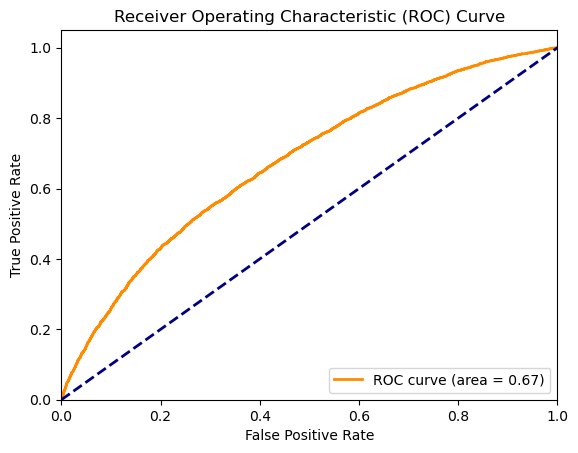

In [63]:
from sklearn.metrics import roc_curve,auc
# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plotting the AUC-ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Now lets try with some complex model

## XGBoost !!!

**High Performance:** XGBoost is known for its high performance and efficiency. It often outperforms other algorithms in terms of accuracy and speed, making it a popular choice for many machine learning tasks.
Handling Missing Values: XGBoost can handle missing values internally, which is beneficial when dealing with real-world dfsets that often have incomplete df.

**Feature Importance:** XGBoost provides insights into feature importance, helping us understand which features contribute most to the predictions.

In [64]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report

# Splitting the df into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initializing the XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Defining the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initializing GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=0)

# Fitting GridSearchCV to the training df
grid_search.fit(X_train, y_train)

# Getting the best estimator from the grid search
best_xgb_model = grid_search.best_estimator_

# Predicting the labels and probabilities for the test df using the best model
y_pred = best_xgb_model.predict(X_test)
y_pred_proba = best_xgb_model.predict_proba(X_test)[:, 1]

# Evaluating the best model
print("Best Parameters: ", grid_search.best_params_)
print("Area under the ROC curve: ", roc_auc_score(y_test, y_pred_proba))


Best Parameters:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}
Area under the ROC curve:  0.7555664451018431


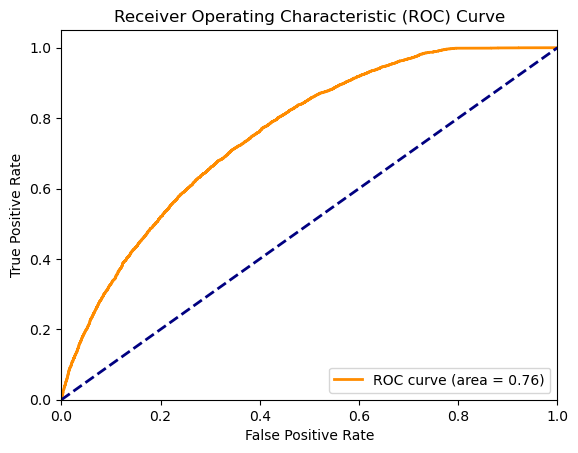

In [65]:
import matplotlib.pyplot as plt

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plotting the AUC-ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Interpretation of Results:

**Logistic Regression Observations:**

1.	**Area Under the ROC Curve (AUC):**
    0.674 (indicating the model’s ability to distinguish between classes is moderate).
2. Logistic Regression with these parameters performs decently but has limitations in capturing complex relationships due to its linear nature.

**XGBoost Observations**

1. **Area Under the ROC Curve (AUC):**
    0.756 (a significant improvement over Logistic Regression).
2. XGBoost outperforms Logistic Regression in terms of ROC AUC due to its ability to capture non-linear patterns and interactions.
3. It is more complex and computationally intensive but yields better predictive performance.

Overall,  XGBoost excels with a higher AUC, showing its suitability for dfsets requiring the capture of non-linear relationships and interactions. It’s a better choice for predictive performance.

### Futher Resources:

You can check out these links if you want to further learn more about research done on this topic.

1. https://ieomsociety.org/proceedings/2022orlando/328.pdf
2. https://ieeexplore.ieee.org/document/10073318
3. https://www.scitepress.org/Papers/2024/128282/128282.pdf
4. https://www.ijnrd.org/papers/IJNRD2407179.pdf